Exploratory Data Analysis (EDA) on Crimes on Women(2001-21)

Importing necessary libraries :- 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Overview of Data

In [2]:
file = 'WomenData.csv'

'''Here is full form of abbrevations of column names present in CSV file
1. K&A => Kidnap & Assault
2. DD => Dowry Deaths
3. AoW => Assault against Women
4. AoM => Assault against Modesty of women
5. DV => Domestic Violence
6. WT => Women Trafficking'''

df = pd.read_csv(file)
df.info() 
df.rename(columns={df.columns[0]:'Sr.No'}, inplace=True)
df.to_csv(file, index=False)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sr.No        736 non-null    int64 
 1   State        736 non-null    object
 2   Year         736 non-null    int64 
 3   Rape         736 non-null    int64 
 4   K&A          736 non-null    int64 
 5   DD           736 non-null    int64 
 6   AoW          736 non-null    int64 
 7   AoM          736 non-null    int64 
 8   DV           736 non-null    int64 
 9   WT           736 non-null    int64 
 10  TotalCrimes  736 non-null    int64 
 11  K&A_Ratio    736 non-null    int64 
 12  DD_Ratio     736 non-null    int64 
 13  AoW_Ratio    736 non-null    int64 
 14  AoM_Ratio    736 non-null    int64 
 15  DV_Ratio     736 non-null    int64 
 16  WT_Ratio     736 non-null    int64 
 17  Rape_Ratio   736 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 103.6+ KB


Sr.No          0
State          0
Year           0
Rape           0
K&A            0
DD             0
AoW            0
AoM            0
DV             0
WT             0
TotalCrimes    0
K&A_Ratio      0
DD_Ratio       0
AoW_Ratio      0
AoM_Ratio      0
DV_Ratio       0
WT_Ratio       0
Rape_Ratio     0
dtype: int64

In [3]:
df.head(34)


,Sr.No,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT,TotalCrimes,K&A_Ratio,DD_Ratio,AoW_Ratio,AoM_Ratio,DV_Ratio,WT_Ratio,Rape_Ratio
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7,13669,1,1,1,1,1,1,1
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0,180,1,0,1,1,1,0,1
2,2,ASSAM,2001,817,1070,59,850,4,1248,0,4048,1,1,1,1,1,0,1
3,3,BIHAR,2001,888,518,859,562,21,1558,83,4489,1,1,1,1,1,1,1
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0,3964,1,1,1,1,1,0,1
5,5,GOA,2001,12,6,2,17,7,11,0,55,1,1,1,1,1,0,1
6,6,GUJARAT,2001,286,857,67,756,111,3667,0,5744,1,1,1,1,1,0,1
7,7,HARYANA,2001,398,297,285,478,401,1513,0,3372,1,1,1,1,1,0,1
8,8,HIMACHAL PRADESH,2001,124,105,10,310,14,317,0,880,1,1,1,1,1,0,1
9,9,JAMMU & KASHMIR,2001,169,504,13,622,288,50,0,1646,1,1,1,1,1,0,1


In [4]:
df.describe()

,Sr.No,Year,Rape,K&A,DD,AoW,AoM,DV,WT,TotalCrimes,K&A_Ratio,DD_Ratio,AoW_Ratio,AoM_Ratio,DV_Ratio,WT_Ratio,Rape_Ratio
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,367.500000,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565,6613.752717,0.936141,0.752717,0.927989,0.847826,0.961957,0.470109,0.974185
std,212.609188,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660,9056.583832,0.244667,0.431726,0.258682,0.359434,0.191431,0.499445,0.158692
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.750000,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000,146.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,367.500000,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000,2632.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,551.250000,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000,10299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,735.000000,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000,52246.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Here's the explaination of above output, i.e. what each column means :- 

1. count: Total no. of non‐missing values present in the column.
2. mean: The average value.
3. std: The standard deviation of the data.
4. min: The smallest value in the column.
5. 25%: 25% of the data values lie below this number.
6. 50%: Half of the data values lie below this number, and half lie above.
7. 75%: 75% of the data values lie below this number.
8. max: The largest value in the column.

Data Cleaning :- 

In [5]:
df["K&A_Ratio"] = df["K&A_Ratio"].replace("","0")
df["DD_Ratio"] = df["DD_Ratio"].replace("","0")
df["AoW_Ratio"] = df["AoW_Ratio"].replace("","0")
df["AoM_Ratio"] = df["AoM_Ratio"].replace("","0")
df["DV_Ratio"] = df["DV_Ratio"].replace("","0")
df["WT_Ratio"] = df["WT_Ratio"].replace("", 0)
df["Rape_Ratio"] = df["Rape_Ratio"].replace("", 0)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sr.No        736 non-null    int64 
 1   State        736 non-null    object
 2   Year         736 non-null    int64 
 3   Rape         736 non-null    int64 
 4   K&A          736 non-null    int64 
 5   DD           736 non-null    int64 
 6   AoW          736 non-null    int64 
 7   AoM          736 non-null    int64 
 8   DV           736 non-null    int64 
 9   WT           736 non-null    int64 
 10  TotalCrimes  736 non-null    int64 
 11  K&A_Ratio    736 non-null    int64 
 12  DD_Ratio     736 non-null    int64 
 13  AoW_Ratio    736 non-null    int64 
 14  AoM_Ratio    736 non-null    int64 
 15  DV_Ratio     736 non-null    int64 
 16  WT_Ratio     736 non-null    int64 
 17  Rape_Ratio   736 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 103.6+ KB


In [6]:
df.isnull().sum()

Sr.No          0
State          0
Year           0
Rape           0
K&A            0
DD             0
AoW            0
AoM            0
DV             0
WT             0
TotalCrimes    0
K&A_Ratio      0
DD_Ratio       0
AoW_Ratio      0
AoM_Ratio      0
DV_Ratio       0
WT_Ratio       0
Rape_Ratio     0
dtype: int64

Adding New Features :- 

In [7]:

crime_cols = ["Rape", "K&A", "DD", "AoW", "AoM", "DV", "WT"]
df['TotalCrimes'] = df[crime_cols].sum(axis=1)
df['K&A_Ratio'] = np.ceil(df['K&A'] / df['TotalCrimes'])
df['Rape_Ratio'] = np.ceil(df['Rape'] / df['TotalCrimes'])
df['DD_Ratio'] = np.ceil(df['DD'] / df['TotalCrimes'])
df['AoW_Ratio'] = np.ceil(df['AoW'] / df['TotalCrimes'])
df['AoM_Ratio'] = np.ceil(df['AoM'] / df['TotalCrimes'])
df['DV_Ratio'] = np.ceil(df['DV'] / df['TotalCrimes'])
df['WT_Ratio'] = np.ceil(df['WT'] / df['TotalCrimes'])
df.to_csv(file, index=False)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sr.No        736 non-null    int64  
 1   State        736 non-null    object 
 2   Year         736 non-null    int64  
 3   Rape         736 non-null    int64  
 4   K&A          736 non-null    int64  
 5   DD           736 non-null    int64  
 6   AoW          736 non-null    int64  
 7   AoM          736 non-null    int64  
 8   DV           736 non-null    int64  
 9   WT           736 non-null    int64  
 10  TotalCrimes  736 non-null    int64  
 11  K&A_Ratio    729 non-null    float64
 12  DD_Ratio     729 non-null    float64
 13  AoW_Ratio    729 non-null    float64
 14  AoM_Ratio    729 non-null    float64
 15  DV_Ratio     729 non-null    float64
 16  WT_Ratio     729 non-null    float64
 17  Rape_Ratio   729 non-null    float64
dtypes: float64(7), int64(10), object(1)
memory usage: 

In [8]:
df.describe()

,Sr.No,Year,Rape,K&A,DD,AoW,AoM,DV,WT,TotalCrimes,K&A_Ratio,DD_Ratio,AoW_Ratio,AoM_Ratio,DV_Ratio,WT_Ratio,Rape_Ratio
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,729.000000,729.000000,729.00000,729.000000,729.000000,729.000000,729.000000
mean,367.500000,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565,6613.752717,0.945130,0.759945,0.93690,0.855967,0.971193,0.474623,0.983539
std,212.609188,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660,9056.583832,0.227882,0.427410,0.24331,0.351364,0.167377,0.499698,0.127327
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,183.750000,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000,146.750000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000
50%,367.500000,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000,2632.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000
75%,551.250000,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000,10299.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
max,735.000000,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000,52246.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


Visualization of data :- 

1. Total no. of Women Crimes happened in India (Year-Wise) :- 


In [9]:
crime_cols = ["Rape", "K&A", "DD", "AoW", "AoM", "DV", "WT"]
total_crimes_per_year = df.groupby('Year')[crime_cols].max().reset_index()
print(total_crimes_per_year)

    Year  Rape    K&A    DD    AoW   AoM     DV   WT
0   2001  2851   2879  2211   7063  2575   7365   83
1   2002  2891   2298  1893   7118  2024   7018   38
2   2003  2738   1750  1322   6848  4970   8167   37
3   2004  2875   2324  1708   6690  2682   8388   36
4   2005  2921   2256  1564   6426  2881   8696   74
5   2006  2900   2551  1798   6243  2714   9164   42
6   2007  3010   3363  2076   6772  3316  11335   56
7   2008  2937   4439  2237   6445  3551  13663   39
8   2009  2998   5078  2232   6307  3520  16112   31
9   2010  3135   5468  2217   6646  4562  17796    8
10  2011  3406   7525  2322      0  3658  19772  497
11  2012  3425   7910  2244   6655  3714  19865  500
12  2013  4335   9737  2335   8252  4702  18116  549
13  2014  5076  10626  2203  10001  4435  23278  471
14  2015  4391  10135  2335  11713  5925  20163  491
15  2016  4882  12994  2473  11396  9422  19302  432
16  2017  5562  14993  2524  12607  1998  16800  403
17  2018  5433  15381  2444  12555  1802  1695

[1] Grouped barplot :

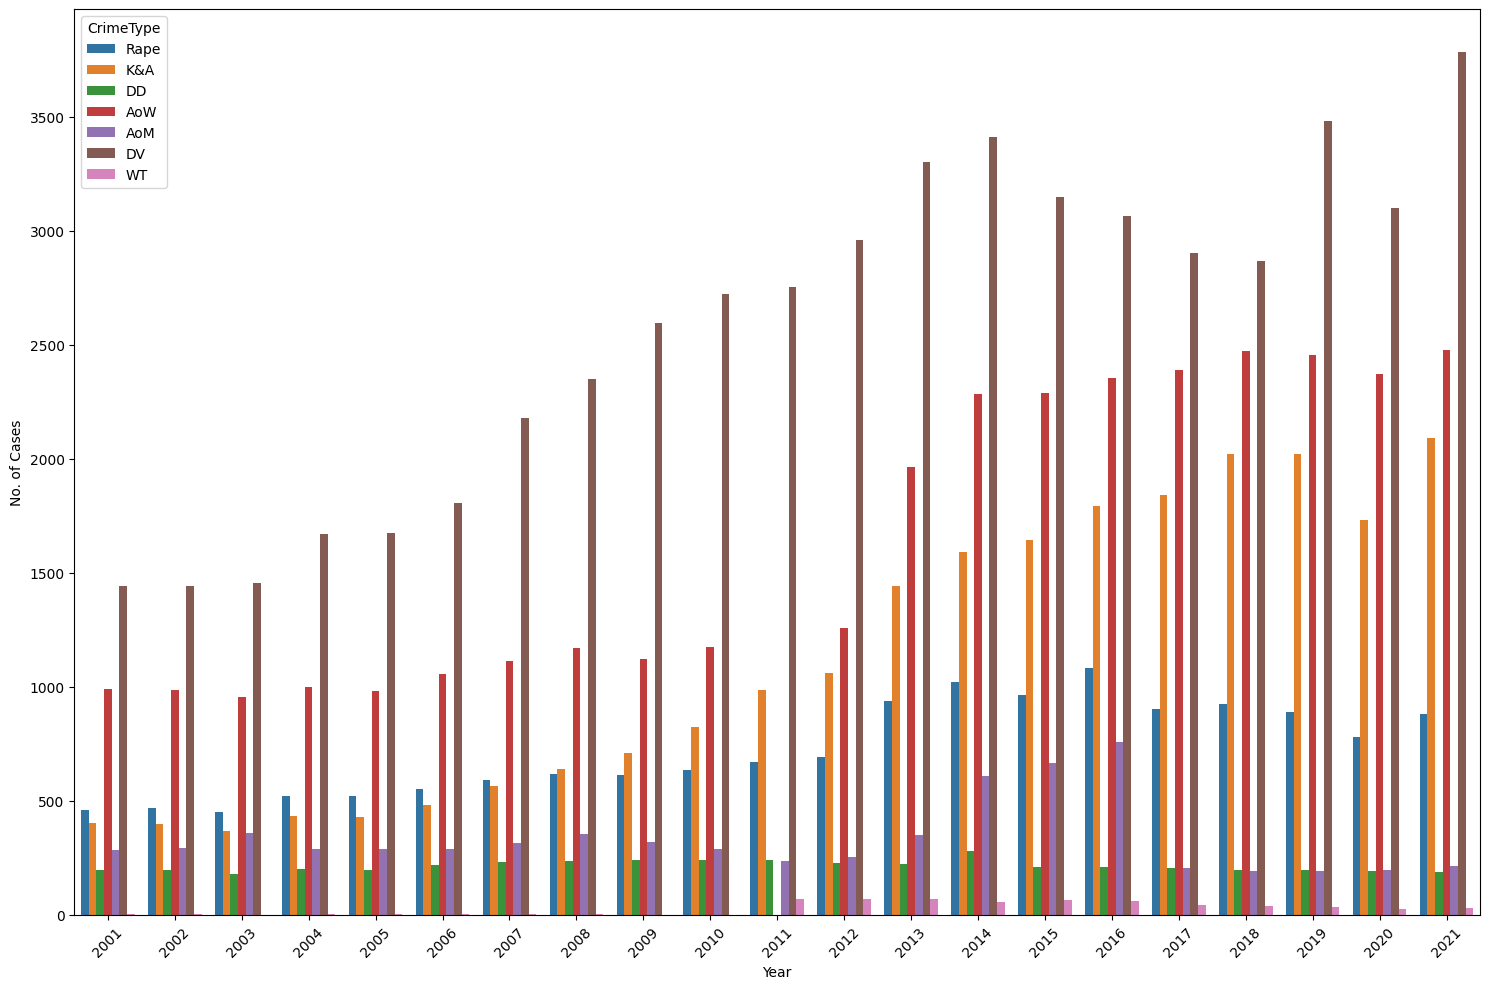

In [10]:
crime_cols = ["Rape", "K&A", "DD", "AoW", "AoM", "DV", "WT"]
df_melted = df.melt(id_vars="Year", value_vars=crime_cols, var_name="CrimeType", value_name="Count")

plt.figure(figsize=(15, 10))
sns.barplot(data=df_melted, x='Year', y='Count', hue='CrimeType', errorbar=None)
plt.xlabel("Year")
plt.ylabel("No. of Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[2] Lineplot :

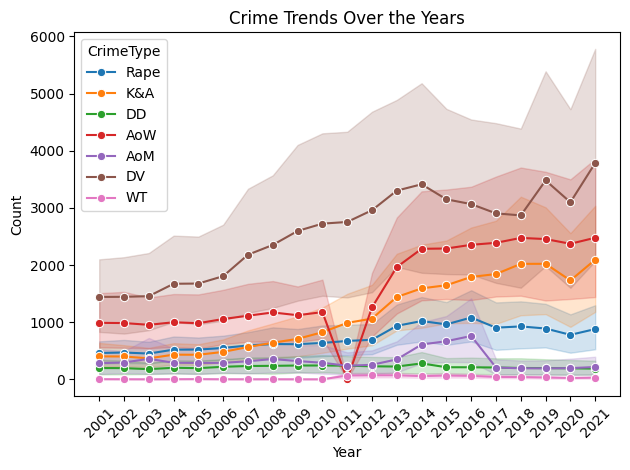

In [11]:
crime_cols = ["Rape", "K&A", "DD", "AoW", "AoM", "DV", "WT"]
df_melted = df.melt(id_vars='Year', value_vars=crime_cols, var_name='CrimeType', value_name='Count')
sns.lineplot(x='Year', y='Count', hue='CrimeType', data=df_melted, marker='o')
all_years = range(df["Year"].min(), df["Year"].max()+1)

plt.xticks(ticks=all_years, labels=all_years, rotation=45)
plt.title("Crime Trends Over the Years")
plt.tight_layout()
plt.show()


1. For Rape Cases :

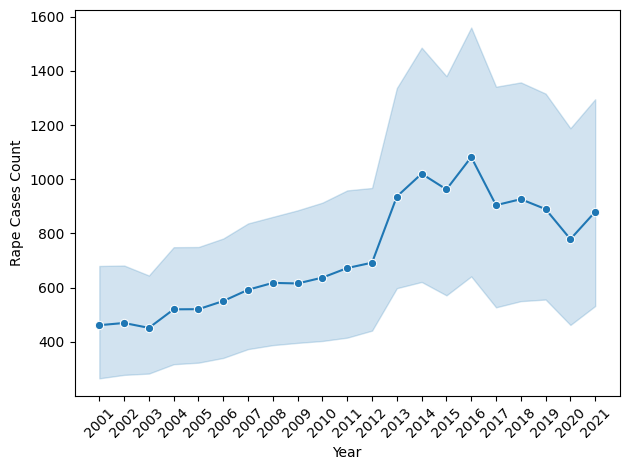

In [12]:
rape_cases = df["Rape"]
year = df["Year"]
sns.lineplot(x=year,y=rape_cases, marker='o')
plt.xlabel("Year")
plt.ylabel("Rape Cases Count")
all_years = range(df["Year"].min(), df["Year"].max()+1)
plt.xticks(ticks=all_years, labels=all_years, rotation=45)
plt.tight_layout()
plt.show()

2. For Domestic Violence : 

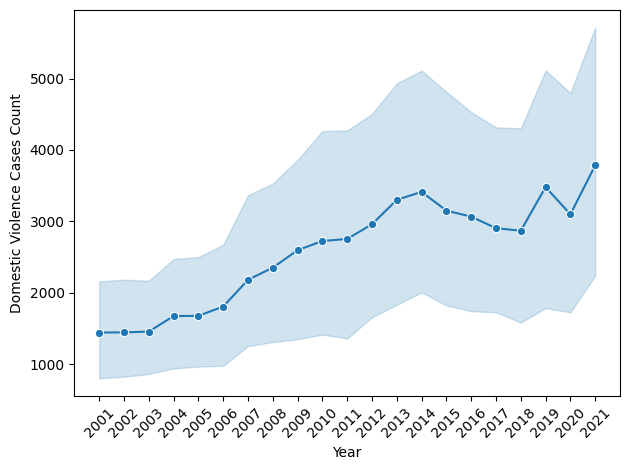

In [13]:
dv_cases = df["DV"]
year = df["Year"]
sns.lineplot(x=year,y=dv_cases, marker='o')
plt.xlabel("Year")
plt.ylabel("Domestic Violence Cases Count")
all_years = range(df["Year"].min(), df["Year"].max()+1)
plt.xticks(ticks=all_years, labels=all_years, rotation=45)
plt.tight_layout()
plt.show()

3. Assault against Women :

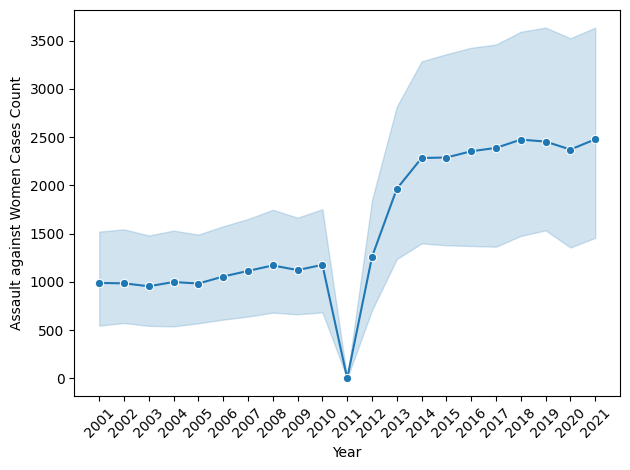

In [14]:
aow_cases = df["AoW"]
year = df["Year"]
sns.lineplot(x=year,y=aow_cases, marker='o')
plt.xlabel("Year")
plt.ylabel("Assault against Women Cases Count")
all_years = range(df["Year"].min(), df["Year"].max()+1)
plt.xticks(ticks=all_years, labels=all_years, rotation=45)
plt.tight_layout()
plt.show()

No. of all Women Crimes happened in Maharashtra (Year-Wise) :- 

In [15]:
crime_cols = ["Rape", "K&A", "DD", "AoW", "AoM", "DV", "WT"]
df['State'] = df['State'].str.strip().str.lower()
maharashtra_df = df[df['State'] == 'maharashtra']
highest_crimes_per_year = maharashtra_df.groupby('Year')[crime_cols].max().reset_index()
print(highest_crimes_per_year)

    Year  Rape   K&A   DD    AoW   AoM    DV   WT
0   2001  1302   611  308   2823  1120  6090    1
1   2002  1352   650  303   2686   769  5353    0
2   2003  1268   626  368   2661   682  5452    0
3   2004  1388   787  314   2831   862  5646    0
4   2005  1545   851  341   3228   919  6233    0
5   2006  1500   921  387   3479   984  6738    1
6   2007  1451   967  436   3306  1039  7356    0
7   2008  1558   998  390   3619  1091  7829    0
8   2009  1483   926  341   3196  1099  7681    0
9   2010  1599  1124  393   3661  1180  7434    0
10  2011  1701  1252  339      0  1071  7136  390
11  2012  1839  1140  329   3935  1294  7415  366
12  2013  3063  1874  320   8132  2632  8542  289
13  2014  3438  2457   39  10001  4052  7696  202
14  2015  4144  5096  268  11713  4751  7640  381
15  2016  4189  6170  248  11396  4057  7215  303
16  2017  1933  6248  233   9392   919  6584  248
17  2018  2142  6825  200  10835  1074  6862  200
18  2019  2299  6906  196  10472  1074  8430  152


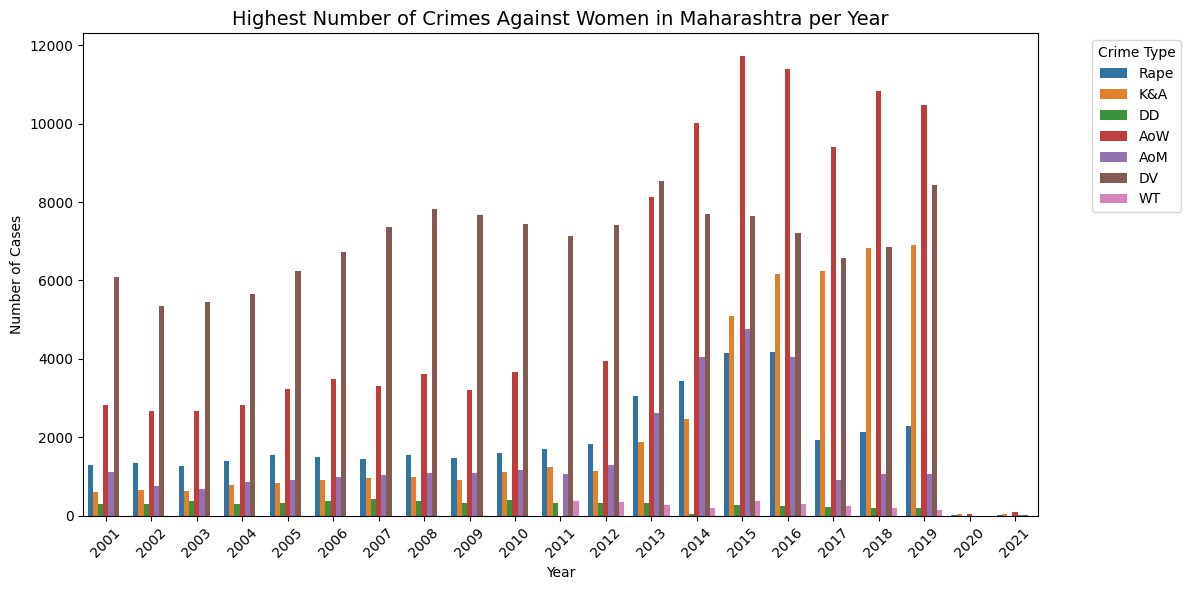

In [16]:
plt.figure(figsize=(12, 6))
df_melted = highest_crimes_per_year.melt(id_vars=['Year'], var_name='Crime Type', value_name='Cases')

# Create a grouped bar plot
sns.barplot(x='Year', y='Cases', hue='Crime Type', data=df_melted)

# Customize the plot
plt.title("Highest Number of Crimes Against Women in Maharashtra per Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Total number of Rape cases happened in Maharashtra per Year :- 

In [17]:
df['State'] = df['State'].str.strip().str.lower()
maharashtra_df = df[df['State'] == 'maharashtra']
highest_rape_per_year = maharashtra_df.groupby('Year')['Rape'].max().reset_index()
print(highest_rape_per_year)


    Year  Rape
0   2001  1302
1   2002  1352
2   2003  1268
3   2004  1388
4   2005  1545
5   2006  1500
6   2007  1451
7   2008  1558
8   2009  1483
9   2010  1599
10  2011  1701
11  2012  1839
12  2013  3063
13  2014  3438
14  2015  4144
15  2016  4189
16  2017  1933
17  2018  2142
18  2019  2299
19  2020    32
20  2021    26


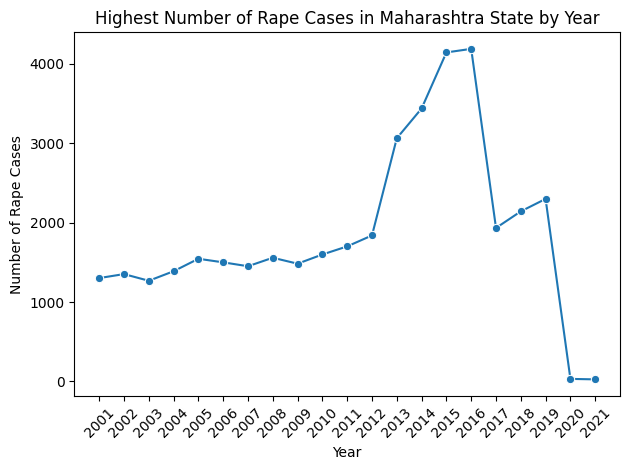

In [18]:

sns.lineplot(data=highest_rape_per_year, x='Year', y='Rape',marker='o')
plt.title('Highest Number of Rape Cases in Maharashtra State by Year')
plt.xlabel('Year')
plt.ylabel('Number of Rape Cases')
plt.xticks(ticks=highest_rape_per_year['Year'].unique(), rotation=45)
plt.tight_layout()
plt.show()